A continuación se muestra una matriz de expresión genética:

En una matriz de expresión génica, cada columna contiene los niveles de transcripción medidos por un microarray. El rocedimiento usual es realizar varios experimentos de microarray, para distintas condiciones, y después juntarlos por columnas en la matriz. En el fondo, ésta es una matriz numérica A con n filas (genes) y m columnas (condiciones) donde el elemento aij es el nivel de transcripción del gen i bajo la condición j.  
En nuestro caso estamos ante una **matriz de expresión genética traspuesta**. Las columnas son mediciones de los genes y cada fila es una observación.

In [1]:
set.seed(2018)
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,⋯,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,⋯,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,⋯,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,⋯,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,⋯,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,⋯,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [2]:
ncol(genexp)
nrow(genexp)

[1] 482

[1] 86

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

In [3]:
#A simple vista no hay valores NA
summary(genexp)

              X       X212284_x_at    X212869_x_at    X213614_x_at  
 Cancer.BC0043T: 1   Min.   : 4812   Min.   : 5277   Min.   : 4157  
 Cancer.BC0051T: 1   1st Qu.: 8499   1st Qu.: 7946   1st Qu.: 7289  
 Cancer.BC0057T: 1   Median :10814   Median :10599   Median :10172  
 Cancer.BC0087T: 1   Mean   :11220   Mean   :10874   Mean   :10429  
 Cancer.BC0109T: 1   3rd Qu.:14140   3rd Qu.:13712   3rd Qu.:13464  
 Cancer.BC0112T: 1   Max.   :19036   Max.   :18227   Max.   :17876  
 (Other)       :80                                                  
  X212391_x_at    X201257_x_at   AFFX.hum_alu_at  X206559_x_at  
 Min.   : 4678   Min.   : 4464   Min.   : 3793   Min.   : 3164  
 1st Qu.: 7776   1st Qu.: 7364   1st Qu.: 7206   1st Qu.: 6936  
 Median : 9624   Median : 9280   Median : 9503   Median : 9189  
 Mean   :10220   Mean   : 9891   Mean   : 9531   Mean   : 9508  
 3rd Qu.:13033   3rd Qu.:12829   3rd Qu.:11796   3rd Qu.:12279  
 Max.   :18229   Max.   :17711   Max.   :15059   Max.   :1

In [4]:
genexp.sina <- na.omit(genexp)
ncol(genexp.sina)
nrow(genexp.sina)

[1] 482

[1] 86

Efecitvamente no hay NA, procedemos a normalizar:

In [5]:
#Normalizamos
for (i in 2:ncol(genexp[,2:482])) {
    mn <- mean(genexp[,i], na.rm=T)
    sd <- sd(genexp[,i], na.rm=T)    
    genexp[,i]<-(genexp[,i]-mn)/sd
}


In [6]:
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.4348964,-0.3480473,-0.4267964,-0.3357943,-0.5709978,-0.6923526,-0.4120570,-0.4092972,1.5176937,25.5825
Cancer.BC0043T,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.3913809,0.9775076,-0.9261639,-1.4005432,-0.5360644,-0.9679607,-1.1016441,-0.3465632,0.9096190,28.7201
Normal.BC0051N,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.2695435,-0.4443742,-0.5773193,-0.2305764,-0.5211235,-0.4658521,-0.8190931,-0.4677517,-0.5667981,45.1721
Cancer.BC0051T,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,-0.1275234,-0.3992954,-0.7322822,-0.9018507,-0.2654248,-0.5231062,-0.5652286,-0.5790853,0.2096817,25.8667
Normal.BC0057N,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,-0.1425315,-0.4026722,0.5097343,-0.2999997,-0.1821947,-0.1829361,-0.4101850,-0.4708336,-0.1790570,35.4706
Cancer.BC0057T,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.3383983,0.8596355,0.1113232,-0.8926497,0.2500582,-0.5011580,-0.1893422,-0.5395743,-0.7577187,24.8679


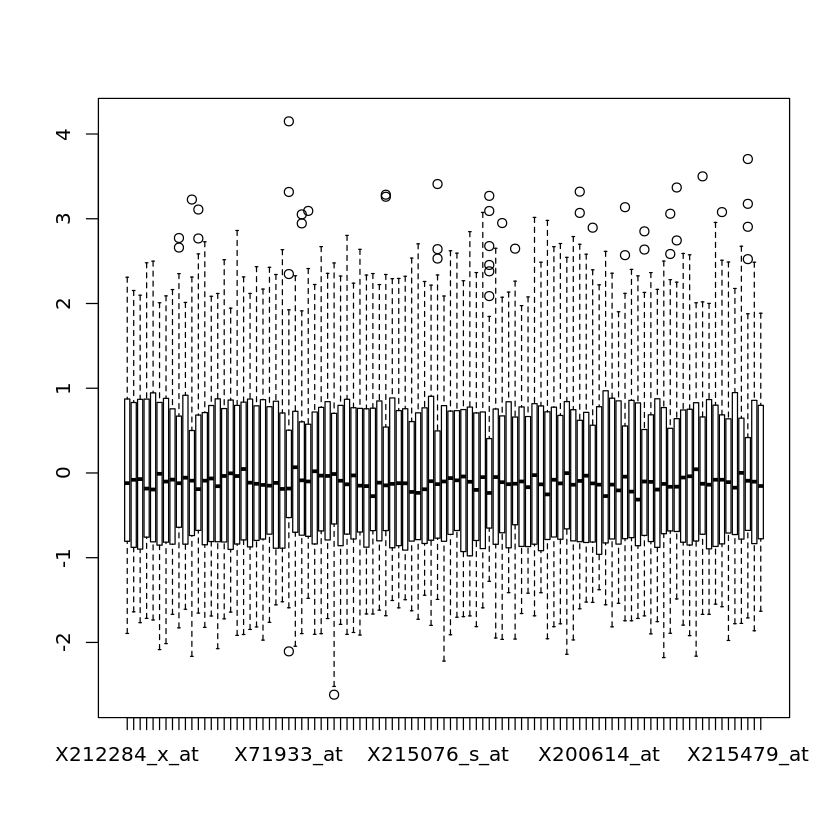

In [7]:
boxplot(genexp[,2:100])

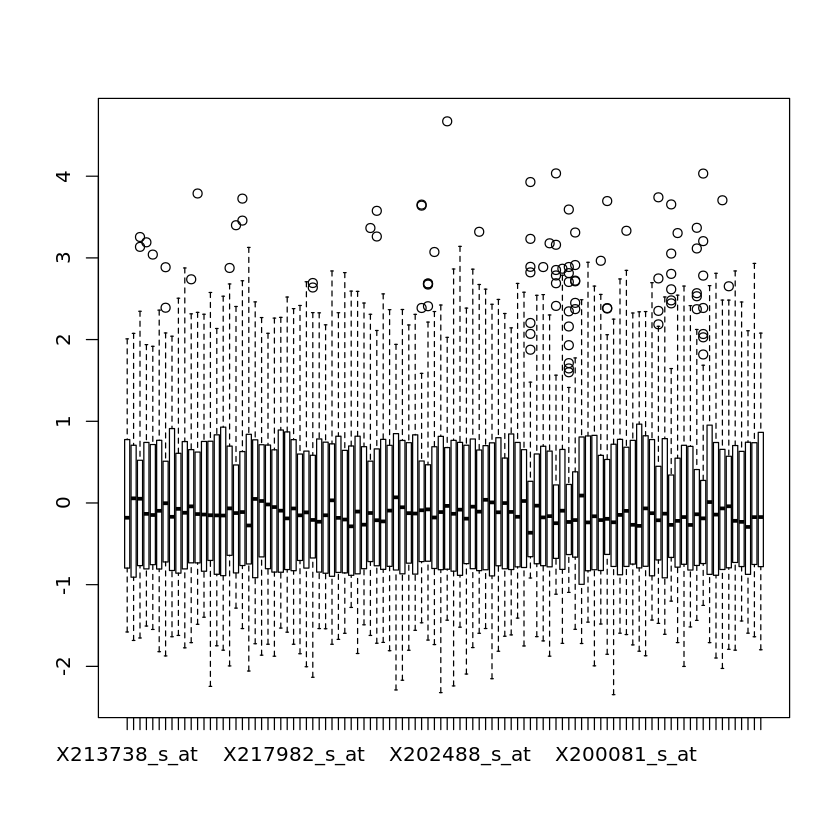

In [8]:
boxplot(genexp[,101:200])

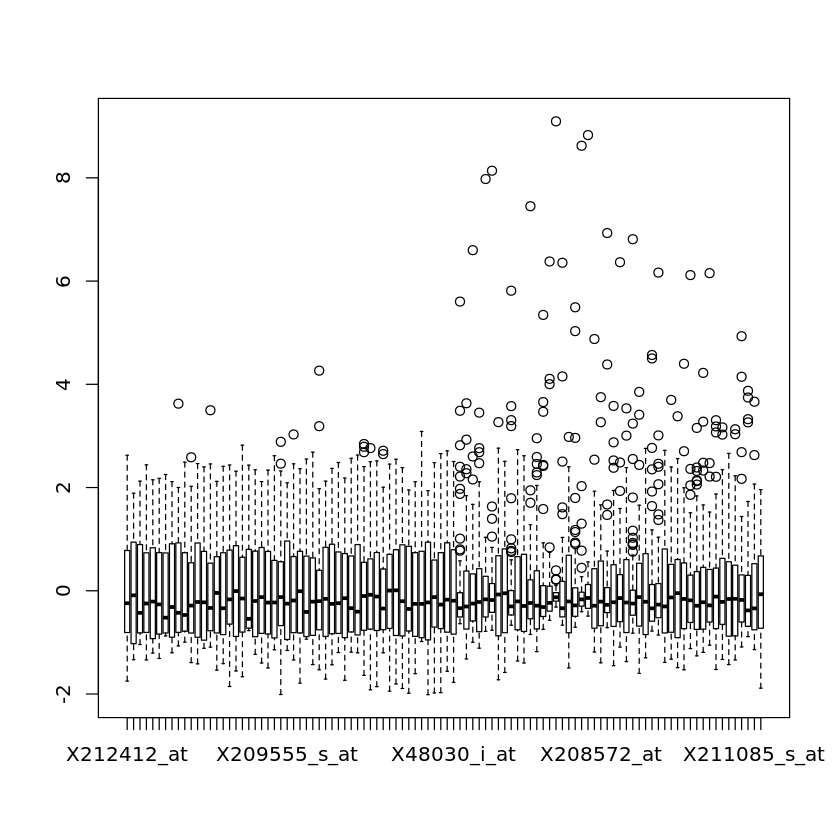

In [9]:
boxplot(genexp[,201:300])

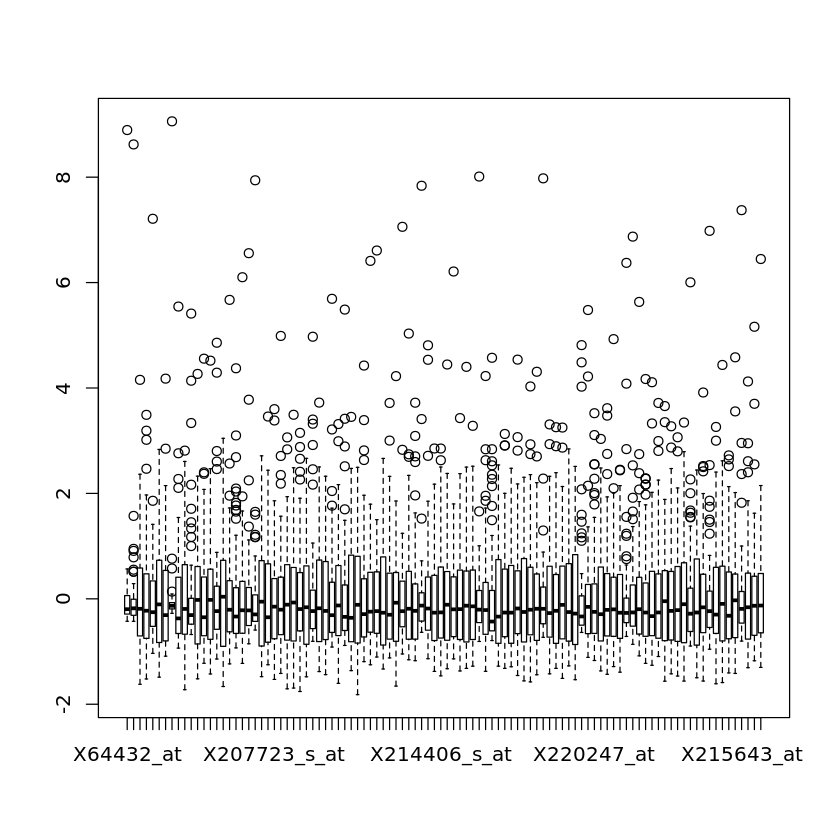

In [10]:
boxplot(genexp[,301:400])

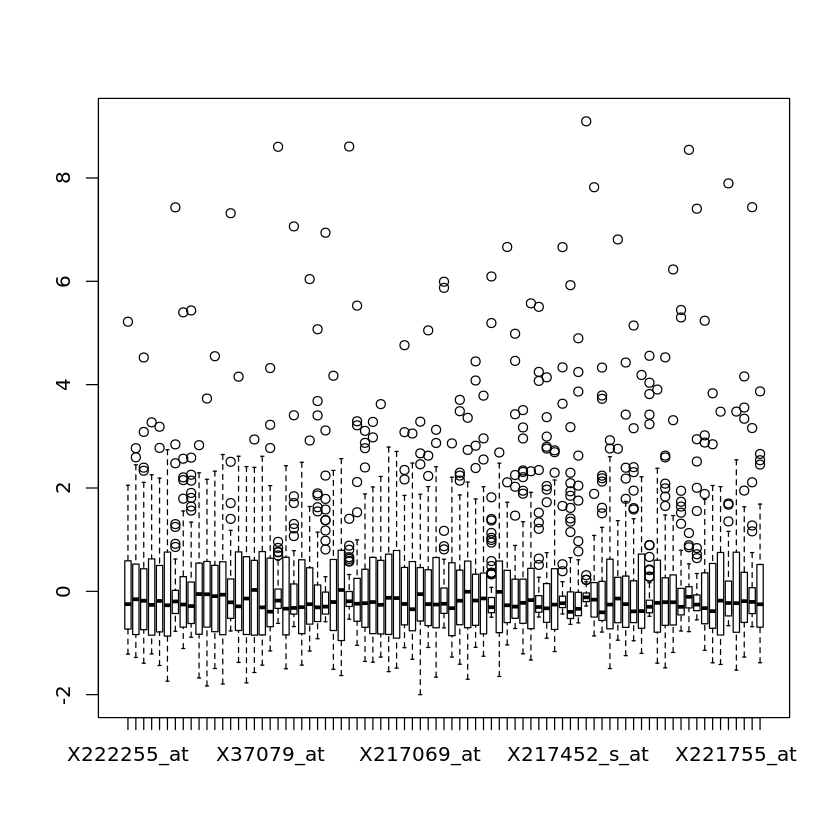

In [11]:
boxplot(genexp[,401:481])

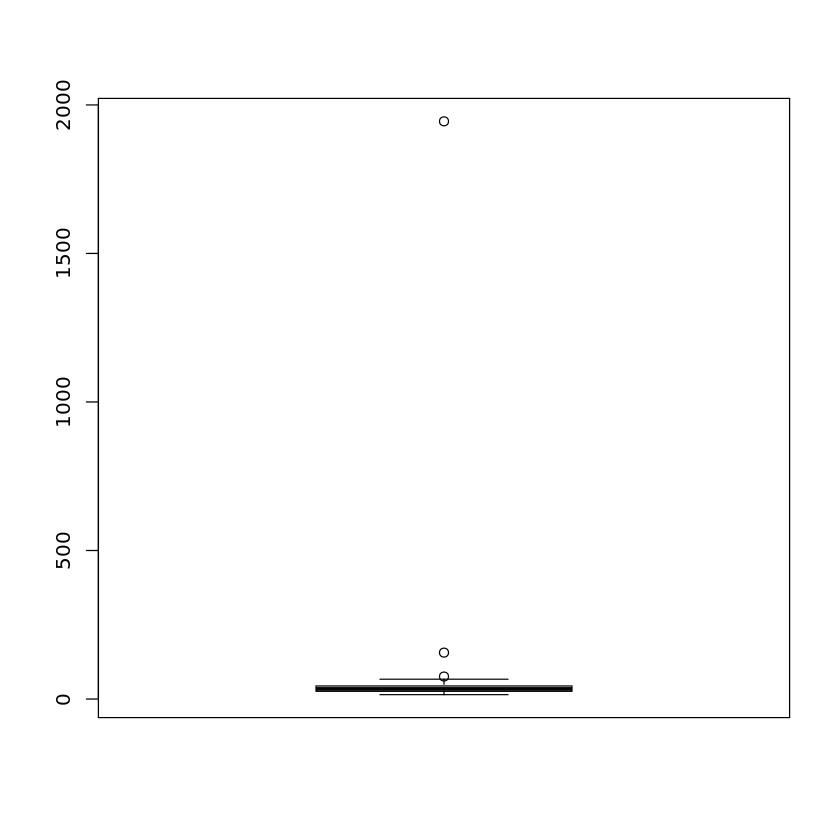

In [12]:
boxplot(genexp[,482])

Observando los gráficos generados podemos ver que los outliers aumentan aproximadamente en la mitad del rango 201 - 300, y que en concreto en la columa 482 hay un valor que se va bastante. No voy a hacer tratamiento de outliers para esta práctica (ya que no parece que vayan a afectar al resultado), aunque se podrían estudiar estos casos y ver el modelo antes y después de quitar los outliers.

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [13]:
for (i in 1:nrow(genexp)) {
    genexp$X <- as.factor(ifelse(grepl("Cancer*",genexp$X), "Cancer", "Normal"))
}

In [14]:
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.4348964,-0.3480473,-0.4267964,-0.3357943,-0.5709978,-0.6923526,-0.4120570,-0.4092972,1.5176937,25.5825
Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.3913809,0.9775076,-0.9261639,-1.4005432,-0.5360644,-0.9679607,-1.1016441,-0.3465632,0.9096190,28.7201
Normal,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.2695435,-0.4443742,-0.5773193,-0.2305764,-0.5211235,-0.4658521,-0.8190931,-0.4677517,-0.5667981,45.1721
Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,-0.1275234,-0.3992954,-0.7322822,-0.9018507,-0.2654248,-0.5231062,-0.5652286,-0.5790853,0.2096817,25.8667
Normal,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,-0.1425315,-0.4026722,0.5097343,-0.2999997,-0.1821947,-0.1829361,-0.4101850,-0.4708336,-0.1790570,35.4706
Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.3383983,0.8596355,0.1113232,-0.8926497,0.2500582,-0.5011580,-0.1893422,-0.5395743,-0.7577187,24.8679


In [15]:
idx<-sample(1:nrow(genexp),round(nrow(genexp)*0.7))
genexp.train <- genexp[ idx,]
genexp.test  <- genexp[-idx,]

model <- glm(formula=X~.,family=binomial(link='logit'),data=genexp.train)

In [16]:
summary(model)


Call:
glm(formula = X ~ ., family = binomial(link = "logit"), data = genexp.train)

Deviance Residuals: 
 [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[51]  0  0  0  0  0  0  0  0  0  0

Coefficients: (422 not defined because of singularities)
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)              3.361e+00  3.472e+05       0        1
X212284_x_at             7.755e+01  1.904e+06       0        1
X212869_x_at            -2.653e+02  4.875e+06       0        1
X213614_x_at            -1.302e+02  2.385e+06       0        1
X212391_x_at             9.819e+00  3.211e+06       0        1
X201257_x_at            -3.246e+01  5.116e+06       0        1
AFFX.hum_alu_at          8.152e+01  4.414e+06       0        1
X206559_x_at            -4.181e-01  1.495e+07       0        1
X214003_x_at             1.316e+02  2.666e+06       0        1
X208755_x_a

In [17]:
nrow(genexp.train)

[1] 60

Vemos que como tenemos muy pocas muestras en el conjunto de entrenamiento (60) y tenemos muchas columnas, sólo se asignan coeficientes a 60 variables (482-422) y el resto están a NA. Este modelo será muy complejo y tendrá overfitting.

**Pintamos la curva ROC**

In [18]:
y_predict<-predict(model,genexp.test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [19]:
y_predict

7          13          16          21          23          24 
 -13.811450   35.368517 -392.721156 -159.205028  101.573159  531.456040 
         32          34          36          41          44          47 
-181.651842   10.912899  250.026068  134.834376 -375.749585 -128.185406 
         54          57          60          61          63          64 
 401.463632  267.090507  -22.689395 -295.570340 -150.336558  114.180328 
         65          70          72          76          79          81 
  32.153272 -275.664992    9.046485  284.149602  320.036638   59.269868 
         83          85 
-117.531119  -96.248808

In [20]:
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA)

In [21]:
calctp_fp<-function(y_predict,y_real,th){
    y_factor<-as.factor(ifelse(y_predict<th,"Normal","Cancer"))    
    M <- table(y_factor,genexp.test$X)
    M
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

In [22]:
for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,genexp.test$X,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

In [23]:
dfROC<-dfROC[order(dfROC$fp),]

In [24]:
dfROC

,th,tp,fp
6,531.456040,0.08333333,0.00000000
13,401.463632,0.16666667,0.00000000
22,284.149602,0.25000000,0.07142857
23,320.036638,0.16666667,0.07142857
9,250.026068,0.33333333,0.14285714
14,267.090507,0.25000000,0.14285714
10,134.834376,0.33333333,0.21428571
18,114.180328,0.41666667,0.21428571
5,101.573159,0.41666667,0.28571429
24,59.269868,0.41666667,0.35714286


In [25]:
library(ggplot2)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

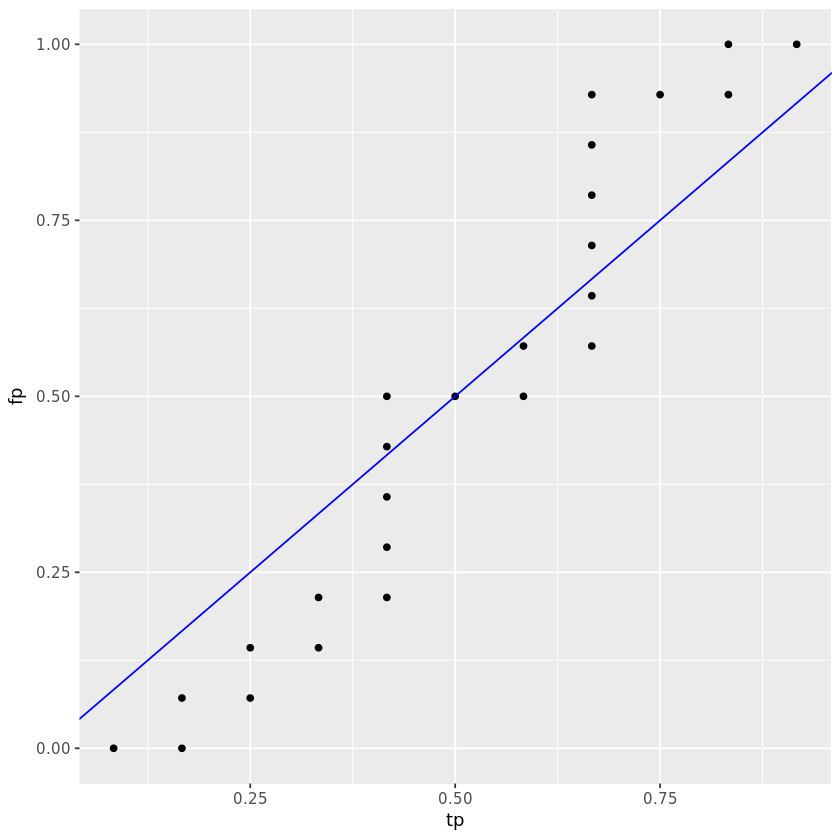

In [26]:
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_point()+
 geom_abline(intercept = 0,slope = 1, color="blue")+coord_cartesian(xlim = c(0, 0), ylim = c(0,0))+coord_flip()

La diagonal representada por la línea azul nos marca el límite por el que iría una predicción aleatoria, es decir, una predicción con el mismo número de casos acertados que fallados. Vemos que nuestro modelo es bastante malo, ya que la curva ROC pasa por debajo de la diagonal para bastantes thresholds.

* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión

In [27]:
th = 0

**Matriz de confusión:**

In [28]:
y_factor <- as.factor(ifelse(y_predict<th,"Normal","Cancer"))    
M <- table(y_factor,genexp.test$X)
M

        
y_factor Cancer Normal
  Cancer      7      7
  Normal      5      7

* **Precisión**
* **Exactitud**
* **Exhaustividad**
* **F0.5**

In [29]:
paste("Precision:", M[1,1]/(M[1,2]+M[1,1]))
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))
paste("Exhausitivad:", M[1,1]/(M[2,1]+M[1,1]))
p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
F05<-0.5
paste("F0.5:", (1+F05^2)*(p*e)/(F05^2*p+e))

[1] "Precision: 0.5"

[1] "Exactitud: 0.538461538461538"

[1] "Exhausitivad: 0.583333333333333"

[1] "F0.5: 0.514705882352941"

Vemos que el modelo no es demasiado preciso

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

In [30]:
#Así a priori se me ocurre dividir en dos clusters
genexp.cluster <- genexp[,2:482]
clusterKMeans <- kmeans(genexp.cluster,2)

In [31]:
clusterKMeans

K-means clustering with 2 clusters of sizes 85, 1

Cluster means:
  X212284_x_at X212869_x_at X213614_x_at X212391_x_at X201257_x_at
1 -0.007987661 -0.007906571  -0.01611082  -0.01500859  -0.01237994
2  0.678951161  0.672058566   1.36942011   1.27572980   1.05229489
  AFFX.hum_alu_at X206559_x_at X214003_x_at X208755_x_at X200062_s_at
1     -0.01051349  -0.01297422  -0.01114789  0.008985336  -0.02013154
2      0.89364643   1.10280856   0.94757046 -0.763753547   1.71118125
  X201429_s_at X213828_x_at X200717_x_at X201891_s_at X213477_x_at X213080_x_at
1  -0.01570923  0.005722886  -0.02903924 -0.007575866  -0.01284916 -0.002010618
2   1.33528431 -0.486445335   2.46833555  0.643948621   1.09217835  0.170902519
   X200633_at  X200926_at X200933_x_at X213583_x_at X204892_x_at X201492_s_at
1 -0.01027204 -0.01467176 -0.009169745  -0.01025844  -0.01071447 -0.009850122
2  0.87312355  1.24709927  0.779428317   0.87196702   0.91072954  0.837260384
  X200095_x_at X208695_s_at X207783_x_at    X7193

Vemos que si intentamos hacer dos clusters con kmeans nos clasifica 85 muestras en un cluster y una en otro cluster.

In [32]:
print(paste("La distancia inter clusters es:",clusterKMeans$betweenss))

[1] "La distancia inter clusters es: 3598372.9379779"


In [33]:
print(paste("La distancia intra clusters es",clusterKMeans$withinss))

[1] "La distancia intra clusters es 65226.3188507603"
[2] "La distancia intra clusters es 0"               


En la distancia de los elementos dentro de un cluster vemos que es 65226.3188507603 para el cluster de 85 elementos y 0 para el cluster de 1 elemento

In [34]:
print(paste("La medida de calidad de este cluster es:",clusterKMeans$betweenss / clusterKMeans$totss))

[1] "La medida de calidad de este cluster es: 0.982196109814908"


Tiene una buena medida de calidad, así que aparentemente el número de clusters óptimos es 2, vamos a hacer un barrido de k para ver los distintos valores de q

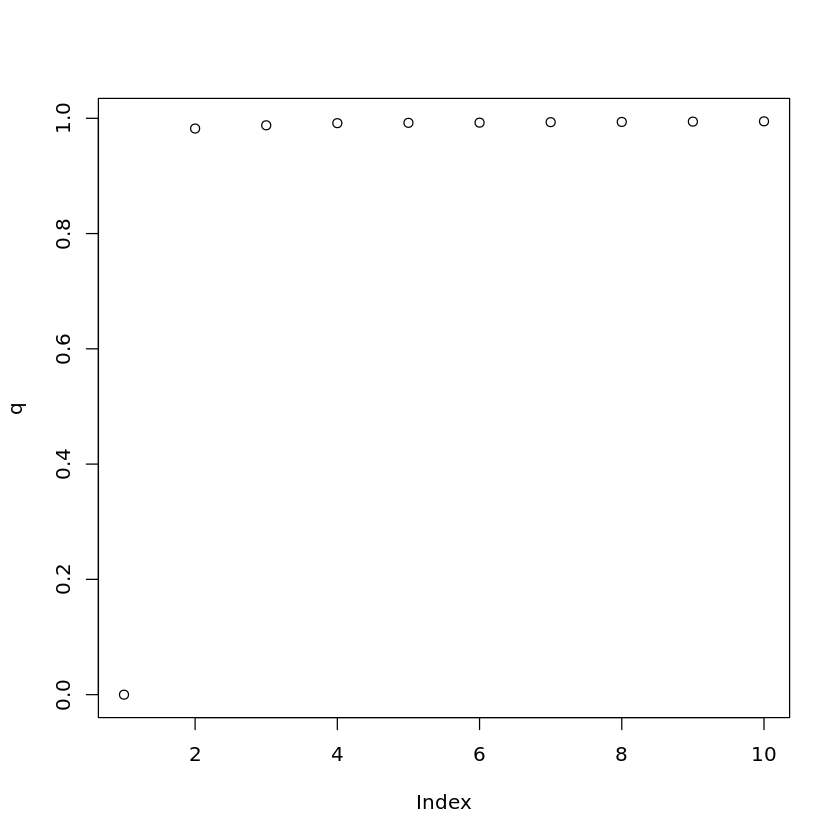

In [35]:
q<-c()
for (k in 1:10){
    myclust<-kmeans(genexp.cluster,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

Con el gráfico vemos que a partir del valor k=2 apenas mejora q, por lo que el número óptimo de clusters sería 2

In [36]:
myclust <- kmeans(genexp[,2:482], 2)
table(genexp$X, myclust$cluster)

        
          1  2
  Cancer  1 42
  Normal  0 43

El cluster 1 identifica sólo las muestras con Cancer, aunque tampoco es que sea una maravilla porque sólo contiene una muestra.

In [37]:
myclust <- kmeans(genexp[,2:482], 3)
table(genexp$X, myclust$cluster)

        
          1  2  3
  Cancer 23  1 19
  Normal 20  0 23

Aquí seguimos igual que con k igual a dos

In [38]:
myclust <- kmeans(genexp[,2:482], 4)
table(genexp$X, myclust$cluster)

        
          1  2  3  4
  Cancer 18  1  1 23
  Normal 23  0  0 20

Resultados parecidos al caso anterior

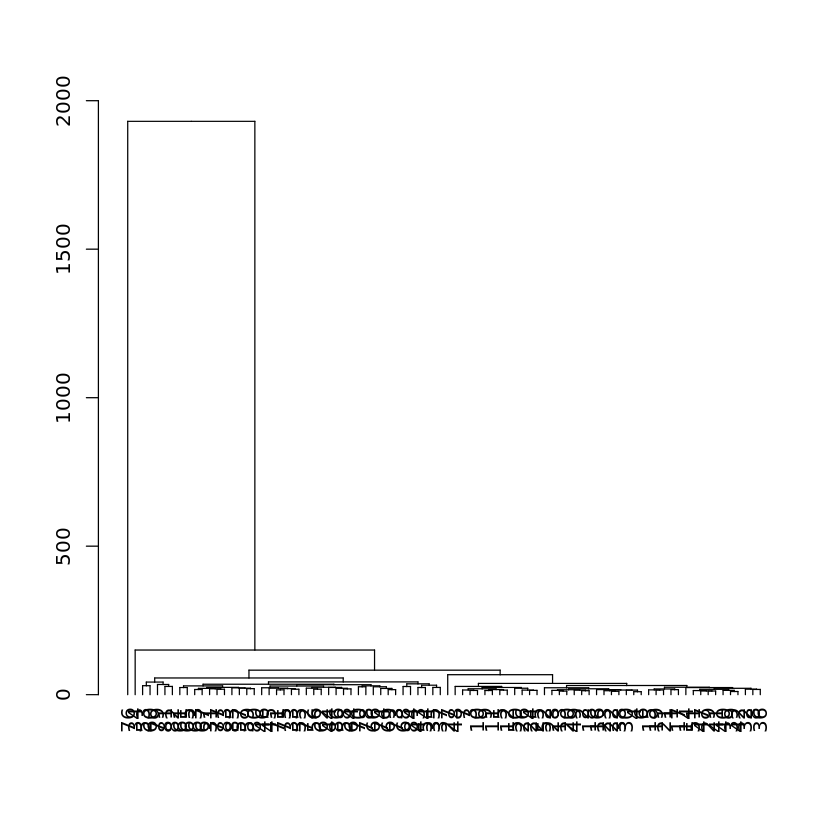

In [39]:
#Dendrograma
d <- dist(as.matrix(genexp.cluster),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Parece que hay mucha distancia entre el clúster 1 y el resto. Intuyo que el cluster 1 es el de un elemento. Vamos a analizar distintos cortes en el dendrograma para ver si encontramos algún cluster interesante:

In [40]:
table(genexp$X, cutree(hc,h=400))

        
          1  2
  Cancer 42  1
  Normal 43  0

In [41]:
table(genexp$X, cutree(hc,h=80))

        
          1  2  3  4
  Cancer 23 18  1  1
  Normal 20 23  0  0

Aquí vemos que los cluster 3 y 4 identifican a casos con cáncer, pero estamos como antes, solo una muestra en cada uno de ellos

In [42]:
table(genexp$X, cutree(hc,h=50))

        
          1  2  3  4  5  6
  Cancer 23  0 16  1  2  1
  Normal 19  1 20  0  3  0

No apreciamos muchos cambios con este último corte.

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

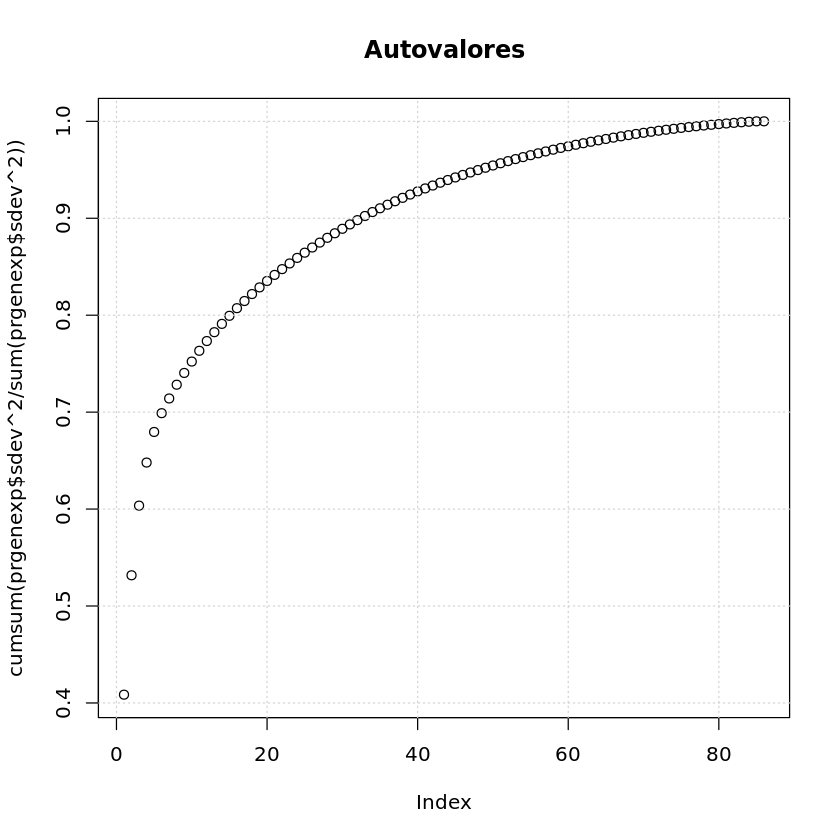

In [43]:
diagnostico <- genexp$X
genexp <- genexp[,2:482]
prgenexp <- prcomp(genexp,center = TRUE, scale. = TRUE)
plot(cumsum(prgenexp$sdev^2/sum(prgenexp$sdev^2)),main="Autovalores")
grid()

Comprobamos que los 6 primeros autovalores contienen más del 70% de la varianza

In [44]:
#Nos quedamos con los dos valores más representativos
head(prgenexp$x[,c(1:2)])

PC1,PC2
-15.943631,2.9012870
-8.738585,-9.6768034
-14.384371,3.4423130
-11.600260,-2.4953920
-11.359176,4.2280798
-13.697708,-0.6846294


In [45]:
pca_data <- as.data.frame(prgenexp$x[,1:2])
pca_data$X <- diagnostico

Pintamos la nube de puntos

        
          1  2
  Cancer 24 19
  Normal 20 23

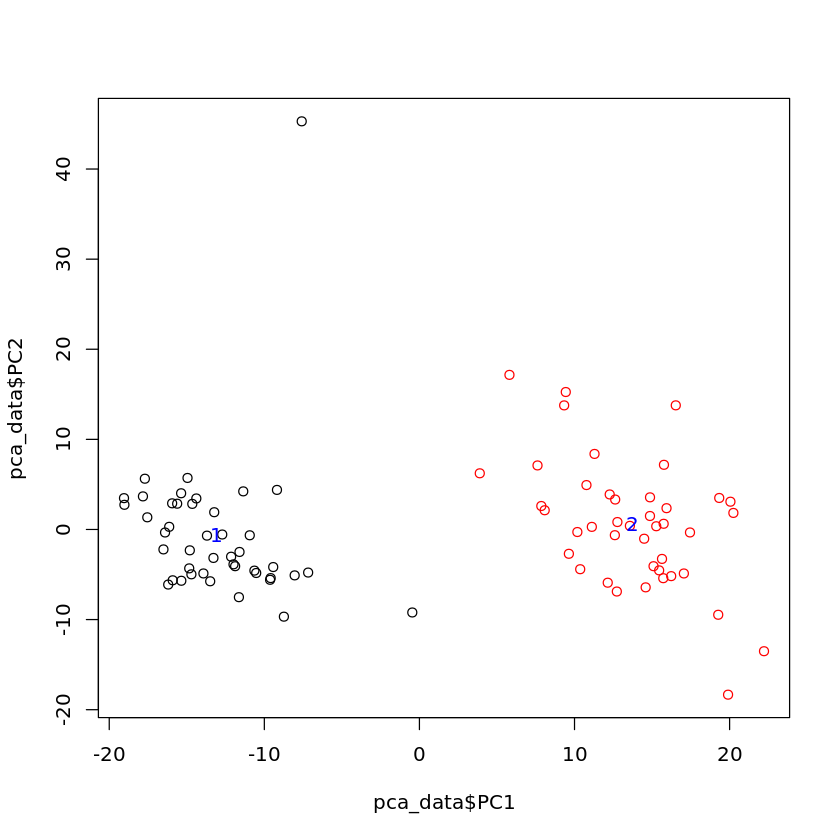

In [46]:
my_clust <- kmeans(prgenexp$x[,1:2],2)
plot(pca_data$PC1,pca_data$PC2,col=my_clust$cluster)
text(x=my_clust$centers[,1],y=my_clust$centers[,2], cex=1, labels=(1:nrow(my_clust$centers)), col="blue")
table(pca_data$X, my_clust$cluster)

Realizamos el modelo de regresión logística con la representación simplificada de los dos valores

In [47]:
idx <- sample(1:nrow(pca_data),nrow(pca_data)*0.7)
genexp.train <- pca_data[idx,]
genexp.test <- pca_data[-idx,]

model_genexp <- glm(data=genexp.train, formula=X~., family=binomial(link='logit'))

y_predict <- predict(model_genexp,genexp.test)
y_factor <- as.factor(ifelse(y_predict<0, "Normal", "Cancer"))

table(y_factor, genexp.test$X)

        
y_factor Cancer Normal
  Cancer     12      7
  Normal      4      3

Los resultados son muy parecidos a los del modelo del punto 1

**Curva ROC**

In [48]:
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA)

In [49]:
calctp_fp<-function(y_predict,y_real,th){
    y_factor<-as.factor(ifelse(y_predict<th,"Normal","Cancer"))    
    M <- table(y_factor,genexp.test$X)
    M
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

In [50]:
for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,genexp.test$X,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

In [51]:
dfROC<-dfROC[order(dfROC$fp),]

In [52]:
dfROC

,th,tp,fp
19,0.844840011,0.1875,0.1
21,0.891251577,0.1250,0.1
22,0.958564108,0.0625,0.1
23,1.353795808,0.0000,0.1
10,0.565748838,0.3750,0.2
18,0.554065304,0.4375,0.2
20,0.679010040,0.3125,0.2
25,0.706586750,0.2500,0.2
26,0.806693804,0.1875,0.2
17,0.509732592,0.4375,0.3


Warning message:
“Removed 1 rows containing missing values (geom_point).”

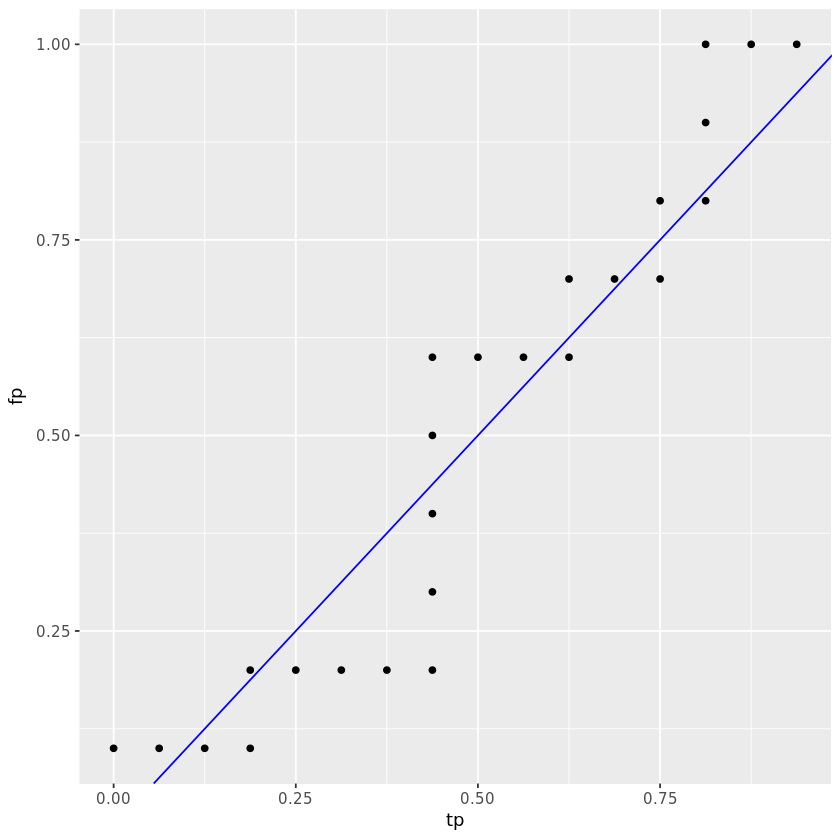

In [53]:
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_point()+geom_abline(intercept = 0,slope = 1, color="blue")+
coord_cartesian(xlim = c(0, 0), ylim = c(0,0))+coord_flip()

Obtenemos un modelo igual de malo que el del punto 1.

Vamos a intentar mejorar el modelo quedándonos con los 6 valores más representativos del PCA

In [54]:
head(prgenexp$x[,c(1:6)])

PC1,PC2,PC3,PC4,PC5,PC6
-15.943631,2.9012870,0.2868669,3.832983,2.2798519,-3.2840898
-8.738585,-9.6768034,-2.7115256,-2.566479,1.7804117,-4.7557887
-14.384371,3.4423130,3.3655697,4.003213,1.7154886,0.5119509
-11.600260,-2.4953920,-4.5132688,1.461536,0.2711851,0.3416183
-11.359176,4.2280798,1.3469536,3.234683,-2.2507377,-2.8333803
-13.697708,-0.6846294,-4.7011825,1.069922,-2.3048301,0.5939084


In [55]:
pca_data <- as.data.frame(prgenexp$x[,1:6])
pca_data$X <- diagnostico

In [56]:
idx <- sample(1:nrow(pca_data),nrow(pca_data)*0.7)
genexp.train <- pca_data[idx,]
genexp.test <- pca_data[-idx,]

model_genexp <- glm(data=genexp.train, formula=X~., family=binomial(link='logit'))

y_predict <- predict(model_genexp,genexp.test)
y_factor <- as.factor(ifelse(y_predict<0, "Normal", "Cancer"))

table(y_factor, genexp.test$X)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

        
y_factor Cancer Normal
  Cancer      0     14
  Normal      8      4

In [57]:
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA)

In [58]:
calctp_fp<-function(y_predict,y_real,th){
    y_factor<-as.factor(ifelse(y_predict<th,"Normal","Cancer"))    
    M <- table(y_factor,genexp.test$X)
    M
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

In [59]:
for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,genexp.test$X,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

In [60]:
dfROC<-dfROC[order(dfROC$fp),]

Warning message:
“Removed 1 rows containing missing values (geom_point).”

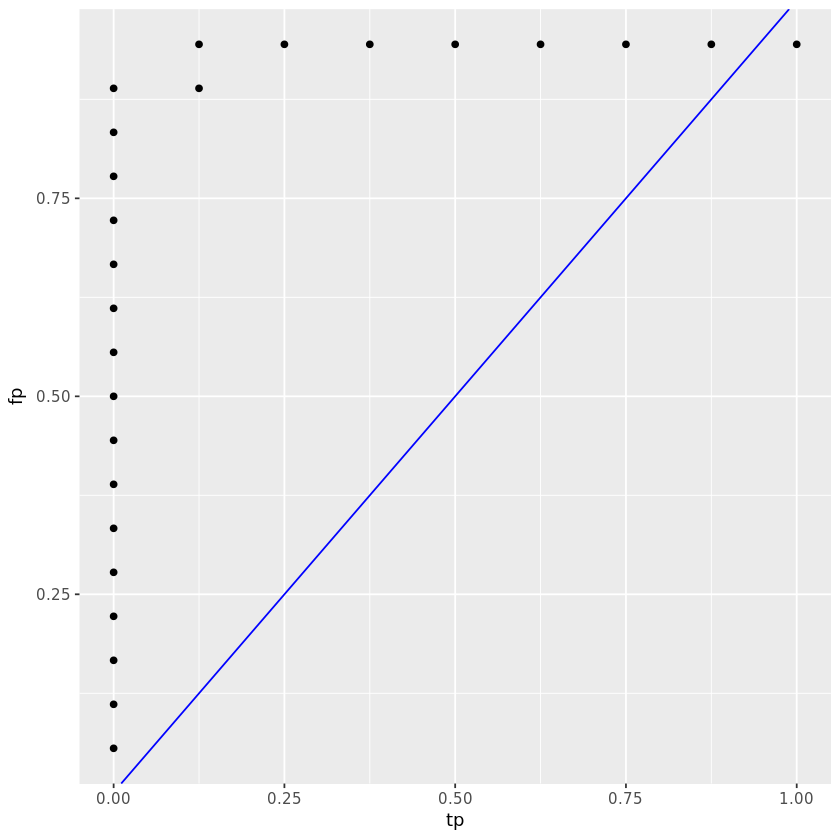

In [61]:
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_point()+geom_abline(intercept = 0,slope = 1, color="blue")+
coord_cartesian(xlim = c(0, 0), ylim = c(0,0))+coord_flip()

Hemos conseguido mejorar mucho el modelo quedándonos con los 6 valores más representativos del PCA